Below is were I am going to pull atleast one file, and begin viewing its contents, extracting ChromaDB Data Entry Points 
that are important to the make-up of the subject involved. The XML files are broken up small enough to view and process on a notebook 
platform. 

In [1]:
import xml.etree.ElementTree as ET
import xml.dom.minidom

xml_file_path = r'/Volumes/NO NAME/xml_chunks/Aalborg Municipality__1.xml'

# Parse the XML file
tree = ET.parse(xml_file_path)
root = tree.getroot()


In [3]:
print(f"Root Element: {root.tag}")
for child in root[:5]:
    print(f"Child element: {child.tag} - {child.attrib}")

Root Element: {http://www.mediawiki.org/xml/export-0.11/}mediawiki
Child element: {http://www.mediawiki.org/xml/export-0.11/}page - {}


In [5]:
# Pretty-print the XML to see the structure
xml_str = ET.tostring(root, encoding='utf-8')
parsed_str = xml.dom.minidom.parseString(xml_str)

# Display the XML in a readable format
 # print(parsed_str.toprettyxml())

In [7]:
# Function to strip namespaces from tags
def strip_namespace(tag):
    return tag.split('}', 1)[-1]  # Remove everything before the '}'

# Set to store unique tag names
tags = set()

# Function to recursively explore all tags in the XML
def extract_tags(element):
    # Add the tag (without namespace) to the tags set
    tags.add(strip_namespace(element.tag))
    
    # Recursively go through each child element
    for child in element:
        extract_tags(child)

# Start extracting tags from the root
extract_tags(root)

# Print out all the unique tags found
print("Unique Tags in the XML:")
for tag in tags:
    print(tag)

Unique Tags in the XML:
title
minor
ip
contributor
parentid
timestamp
comment
id
model
text
ns
mediawiki
revision
origin
format
username
page
sha1


Below I am taking all the data that I want from the xml schema and creating a dataframe to analyze the date inside this 
one xml file. I have 460 xml files to process all together, but once I learn what information I need from one schema, I can change the heading to stream each xml file to get the important information keys from each file. This is just going into one, to find a systematical way to process all of them.

In [9]:

import pandas as pd


# Function to strip namespaces from tags
def strip_namespace(tag):
    return tag.split('}', 1)[-1]  # Remove everything before the '}'

# Initialize an empty list to hold extracted data
data = []

# Iterate through each <page> element
for page in root.findall('.//ns0:page', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}):
    # Extract the title
    title = page.find('.//ns0:title', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}).text if page.find('.//ns0:title', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}) is not None else 'No title'

    # Initialize a list to store revisions for this page
    for revision in page.findall('.//ns0:revision', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}):
        
        # Extract each field within the revision
        revision_data = {
            'title': title,
            'timestamp': revision.find('.//ns0:timestamp', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}).text if revision.find('.//ns0:timestamp', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}) is not None else 'No timestamp',
            'username': revision.find('.//ns0:contributor/ns0:username', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}).text if revision.find('.//ns0:contributor/ns0:username', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}) is not None else 'No username',
            'comment': revision.find('.//ns0:comment', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}).text if revision.find('.//ns0:comment', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}) is not None else 'No comment',
            'text': revision.find('.//ns0:text', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}).text if revision.find('.//ns0:text', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}) is not None else 'No text',
            'sha1': revision.find('.//ns0:sha1', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}).text if revision.find('.//ns0:sha1', namespaces={'ns0': 'http://www.mediawiki.org/xml/export-0.11/'}) is not None else 'No sha1',
            }

        # Add revision data to the list
        data.append(revision_data)

# Convert the list of dictionaries into a Pandas DataFrame
df = pd.DataFrame(data)

# Preview the DataFrame
display(df.head())  # Show first few rows of the DataFrame


title             timestamp           username  \
0  Aalborg Municipality  2002-02-04T03:55:24Z  Conversion script   
1  Aalborg Municipality  2002-02-25T15:43:11Z     imported>31.94   
2  Aalborg Municipality  2002-07-23T03:26:55Z      Magnus Manske   
3  Aalborg Municipality  2002-08-31T05:26:56Z        No username   
4  Aalborg Municipality  2002-09-09T01:24:37Z          The Epopt   

                comment                                               text  \
0  Automated conversion  '''Aalborg''' is a city and seaport of [[Denma...   
1                     *  '''Aalborg''' is a city and seaport of [[Denma...   
2                -/talk  '''Aalborg''' is a city and seaport of [[Denma...   
3             copy-edit  '''Aalborg''' is a city and seaport of [[Denma...   
4     removed self-link  '''Aalborg''' is a city and seaport of [[Denma...   

                              sha1  
0  tkvd4kutgn73kjac7zsi7fz06eri3c5  
1  56wfzuk883j23gvgs35e1v8zwpk1yco  
2  ahmh528xu6po727fb6y64j4nz1ge4dn  
3  75l5zymo21vc9krif06hvp5tttu1i1f  
4  f89w3kj8rfgxzx0xcjfsto0awpterfs

In [11]:
# Show all unique sha1 values
unique_sha1_values = df['sha1'].unique()

print("Unique sha1 values:")
print(unique_sha1_values)

Unique sha1 values:
['tkvd4kutgn73kjac7zsi7fz06eri3c5' '56wfzuk883j23gvgs35e1v8zwpk1yco'
 'ahmh528xu6po727fb6y64j4nz1ge4dn' '75l5zymo21vc9krif06hvp5tttu1i1f'
 'f89w3kj8rfgxzx0xcjfsto0awpterfs' '0aan9isff7c08t160g7mb9qgaytpz0j'
 'syykxq03s0c98jmedhxatweo5vaj8os' 'l042zychv4p7k25gh9gd41qw173xtjt'
 'ef9g3b9yuffr96x1m7ot2dyhqpzbp7k' 'qzt7oze95h72es9qj2nfzrxqd5tvdgh'
 '2dufletsn1h6c2c2lt18yu3352kzyef' 'b6v4z42mm5mkabm1bh71x51vidms1vd'
 '5qc3jntwk3ntxajzu0n1t5z2tzjoeqa' 'No sha1']


In [13]:
sha1_counts = df['sha1'].value_counts()
unique_sha1 = sha1_counts[sha1_counts == 1].index

# Step 3: Filter the DataFrame to show rows with unique sha1 values
unique_sha1_df = df[df['sha1'].isin(unique_sha1)]

# Display the filtered DataFrame
# print(unique_sha1_df)

display(unique_sha1_df)

title             timestamp             username  \
0   Aalborg Municipality  2002-02-04T03:55:24Z    Conversion script   
1   Aalborg Municipality  2002-02-25T15:43:11Z       imported>31.94   
2   Aalborg Municipality  2002-07-23T03:26:55Z        Magnus Manske   
3   Aalborg Municipality  2002-08-31T05:26:56Z          No username   
4   Aalborg Municipality  2002-09-09T01:24:37Z            The Epopt   
5   Aalborg Municipality  2001-06-26T22:58:46Z        KoyaanisQatsi   
6   Aalborg Municipality  2001-09-28T17:58:47Z      213.237.179.xxx   
7   Aalborg Municipality  2002-09-10T23:45:10Z       Christian List   
8   Aalborg Municipality  2002-10-16T16:12:13Z       Christian List   
9   Aalborg Municipality  2002-10-28T07:29:28Z              Olivier   
10  Aalborg Municipality  2002-11-10T09:21:05Z             Jeronimo   
11  Aalborg Municipality  2003-07-14T09:16:51Z  Torkil Bladt~enwiki   
12  Aalborg Municipality  2003-07-14T09:23:44Z  Torkil Bladt~enwiki   
13  Aalborg Municipality  2003-08-28T07:53:03Z         Wazow~enwiki   

                                              comment  \
0                                Automated conversion   
1                                                   *   
2                                              -/talk   
3                                           copy-edit   
4                                   removed self-link   
5   wikifying somewhat and removing 100-year-old f...   
6                                                   *   
7                                            Copyedit   
8                                                 da:   
9                                          No comment   
10                                               edit   
11  Minor corrections, Aalborg University, externa...   
12                                         No comment   
13                                                +pl   

                                                 text  \
0   '''Aalborg''' is a city and seaport of [[Denma...   
1   '''Aalborg''' is a city and seaport of [[Denma...   
2   '''Aalborg''' is a city and seaport of [[Denma...   
3   '''Aalborg''' is a city and seaport of [[Denma...   
4   '''Aalborg''' is a city and seaport of [[Denma...   
5   Aalborg, a city and seaport of [[Denmark]], th...   
6   '''Aalborg''' is a city and seaport of [[Denma...   
7   '''Aalborg''' is a city and seaport of [[Denma...   
8   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...   
9   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...   
10  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
11  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
12  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
13  [[da:Ålborg]][[pl:Aalborg]]\n'''Aalborg''' ([[...   

                               sha1  
0   tkvd4kutgn73kjac7zsi7fz06eri3c5  
1   56wfzuk883j23gvgs35e1v8zwpk1yco  
2   ahmh528xu6po727fb6y64j4nz1ge4dn  
3   75l5zymo21vc9krif06hvp5tttu1i1f  
4   f89w3kj8rfgxzx0xcjfsto0awpterfs  
5   0aan9isff7c08t160g7mb9qgaytpz0j  
6   syykxq03s0c98jmedhxatweo5vaj8os  
7   l042zychv4p7k25gh9gd41qw173xtjt  
8   ef9g3b9yuffr96x1m7ot2dyhqpzbp7k  
9   qzt7oze95h72es9qj2nfzrxqd5tvdgh  
10  2dufletsn1h6c2c2lt18yu3352kzyef  
11  b6v4z42mm5mkabm1bh71x51vidms1vd  
12  5qc3jntwk3ntxajzu0n1t5z2tzjoeqa  
13                          No sha1

Next I want to look inside the text to pull key phrases out that are in [[ __ ]] like da:Aalborg, or Denmark...ect. This builds a hierarchy of relation associated with ontology pyramid. From the text we will create a super and sublevel of classes in columns related to the text.

In [16]:
import re

def extract_unique_links(text):
    # Regular expression to find all substrings in [[ ]]
    links = re.findall(r'\[\[([^\]]+)\]\]', text)
    return set(links)  # Return unique links using a set

# Example: Extract links from the first text in the DataFrame
unique_links_from_first_text = extract_unique_links(unique_sha1_df['text'][0])

# Print the unique links from the first text
print("Unique links from the first text:", unique_links_from_first_text)


Unique links from the first text: {'Cattegat', 'Lille Vildmose', 'Jutland', 'Germany', 'Aarhus', 'Store Vildmose', 'talk:Aalborg|Talk', 'Limfjord', 'Frue', 'Denmark', 'Frederikshavn', 'Hjorring', 'Aalborg', 'Budolphi', 'North Sea', 'Norre Sundby', 'Skagen'}


In [18]:
# text hierarchy
text_df = text_df = unique_sha1_df[['text']]

# Display the 'text' column
display(text_df)


text
0   '''Aalborg''' is a city and seaport of [[Denma...
1   '''Aalborg''' is a city and seaport of [[Denma...
2   '''Aalborg''' is a city and seaport of [[Denma...
3   '''Aalborg''' is a city and seaport of [[Denma...
4   '''Aalborg''' is a city and seaport of [[Denma...
5   Aalborg, a city and seaport of [[Denmark]], th...
6   '''Aalborg''' is a city and seaport of [[Denma...
7   '''Aalborg''' is a city and seaport of [[Denma...
8   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...
9   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...
10  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...
11  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...
12  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...
13  [[da:Ålborg]][[pl:Aalborg]]\n'''Aalborg''' ([[...

In [20]:
from collections import defaultdict
import re
# Regular expression to find all substrings in [[ ]]
def extract_links(text):
    return re.findall(r'\[\[([^\]]+)\]\]', text)

# Function to build the hierarchy from a list of links
def build_hierarchy_from_links(links):

    hierarchy = {}
    current_node = hierarchy

    for link in links:
        if link not in current_node:
            current_node[link] = {}
        current_node = current_node[link]  # Move deeper into the tree

    return hierarchy

# Function to build and add hierarchy column to the DataFrame
def build_class_tree(text_df):
    all_trees = []  # List to store hierarchies for each text entry

    # Iterate over each row in the DataFrame
    for index, row in text_df.iterrows():
        links = extract_links(row['text'])
        
        if len(links) > 1:  # Only consider rows with more than one link (i.e., possible hierarchy)
            hierarchy = build_hierarchy_from_links(links)
        else:
            hierarchy = None  # No hierarchy if only one link is found
        
        all_trees.append(hierarchy)

    # Add the 'hierarchy' column to the DataFrame
    text_df.loc[:,'hierarchy'] = all_trees

    return text_df

# Call the function to build the hierarchy and update the DataFrame
text_df = build_class_tree(text_df)

# Display the updated DataFrame
print(text_df)

                                                 text  \
0   '''Aalborg''' is a city and seaport of [[Denma...   
1   '''Aalborg''' is a city and seaport of [[Denma...   
2   '''Aalborg''' is a city and seaport of [[Denma...   
3   '''Aalborg''' is a city and seaport of [[Denma...   
4   '''Aalborg''' is a city and seaport of [[Denma...   
5   Aalborg, a city and seaport of [[Denmark]], th...   
6   '''Aalborg''' is a city and seaport of [[Denma...   
7   '''Aalborg''' is a city and seaport of [[Denma...   
8   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...   
9   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...   
10  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
11  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
12  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
13  [[da:Ålborg]][[pl:Aalborg]]\n'''Aalborg''' ([[...   

                                            hierarchy  
0   {'Denmark': {'Limfjord': {'North Sea': {'Catte...  
1   {'Denmark': {'Limfjord': {'N

/var/folders/z8/sp5l999n7cv8rd76b5jzvrkh0000gn/T/ipykernel_18216/1630410770.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.loc[:,'hierarchy'] = all_trees


In [22]:
hierarchy_0 = text_df['hierarchy'][0]
# Extract the hierarchy for row 0
hierarchy_0 = text_df['hierarchy'][0]
print("Hierarchy for row 0:")
print(hierarchy_0)


Hierarchy for row 0:
{'Denmark': {'Limfjord': {'North Sea': {'Cattegat': {'Jutland': {'Limfjord': {'Store Vildmose': {'Lille Vildmose': {'Hjorring': {'Frederikshavn': {'Skagen': {'Aarhus': {'Germany': {'Budolphi': {'Frue': {'Limfjord': {'Norre Sundby': {'Aalborg': {'talk:Aalborg|Talk': {}}}}}}}}}}}}}}}}}}}}


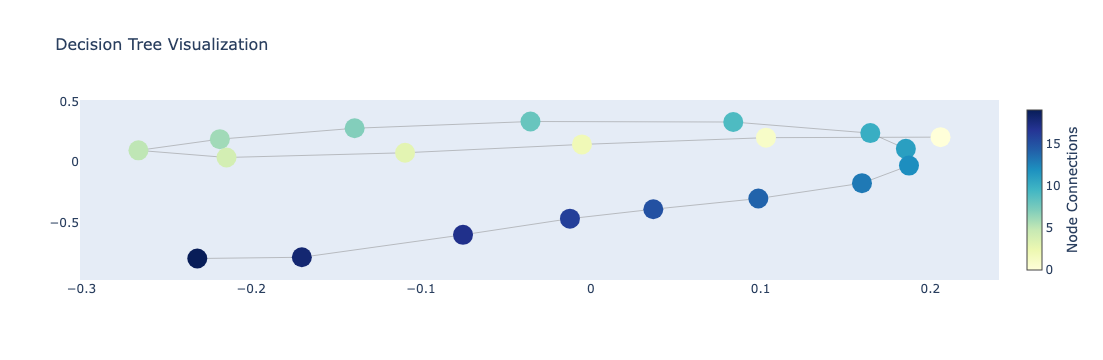

In [24]:
import plotly.graph_objects as go
import networkx as nx

def flatten_hierarchy_to_edges(hierarchy, parent='root', parent_label='Root', node_id=0):
    edges = []
    nodes = {node_id: parent_label}
    
    def traverse(hierarchy, parent, parent_label, node_id):
        nonlocal edges, nodes

        current_node_id = node_id
        node_id += 1  # Increment node id for next level
        
        # Traverse children nodes
        for child_label, child_subtree in hierarchy.items():
            nodes[node_id] = child_label  # Add the child node
            edges.append((current_node_id, node_id))  # Record the edge from parent to child
            node_id = traverse(child_subtree, node_id, child_label, node_id)  # Recurse into the subtree

        return node_id  # Return updated node_id after recursion

    traverse(hierarchy, parent, parent_label, node_id)
    
    return nodes, edges

# Extract the hierarchy for row 0
hierarchy_0 = text_df['hierarchy'][0]

# Flatten the hierarchy and get nodes/edges
nodes, edges = flatten_hierarchy_to_edges(hierarchy_0)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_nodes_from(nodes.items())
G.add_edges_from(edges)

# Layout for plotting (force-directed layout for decision tree appearance)
pos = nx.spring_layout(G, seed=42)  # Use spring layout for better visualization

# Plot the graph using Plotly
edge_x = []
edge_y = []
for edge in edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none', mode='lines')

node_x = []
node_y = []
for node in nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=20,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    ))

# Adding labels to the nodes
node_text = [nodes[node] for node in nodes]
node_trace.marker.color = list(range(len(node_text)))  # Corrected line
node_trace.text = node_text

# Create figure and add the traces
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Decision Tree Visualization",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# Show the plot
fig.show()



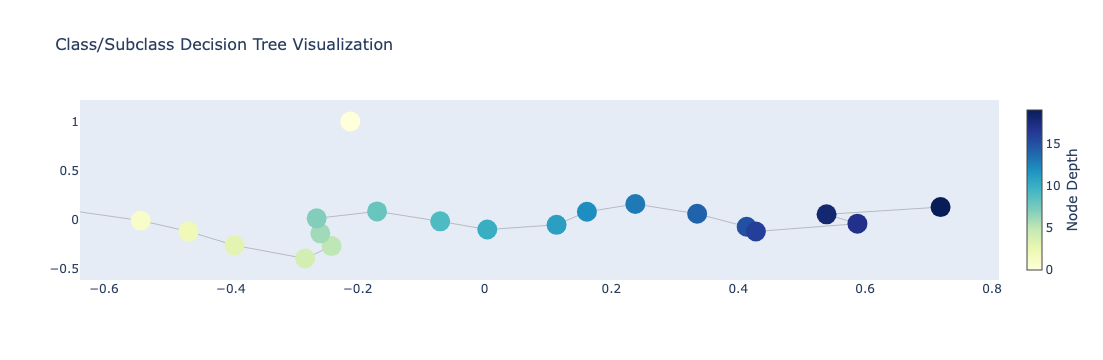

In [26]:
import plotly.graph_objects as go
import networkx as nx

# Function to flatten the hierarchy with depth
def flatten_hierarchy_to_edges(hierarchy, parent='root', parent_label='Root', node_id=0, depth=0):
    edges = []
    nodes = {node_id: {'label': parent_label, 'depth': depth}}  # Track depth for color
    node_id += 1  # Increment node id for next level
    
    def traverse(hierarchy, parent, parent_label, node_id, depth):
        nonlocal edges, nodes

        current_node_id = node_id
        node_id += 1  # Increment node id for next level
        
        # Traverse children nodes
        for child_label, child_subtree in hierarchy.items():
            nodes[node_id] = {'label': child_label, 'depth': depth + 1}  # Store depth info
            edges.append((current_node_id, node_id))  # Record the edge from parent to child
            node_id = traverse(child_subtree, node_id, child_label, node_id, depth + 1)  # Recurse into the subtree

        return node_id  # Return updated node_id after recursion

    traverse(hierarchy, parent, parent_label, node_id, depth)
    
    return nodes, edges

# Extract the hierarchy for row 0
hierarchy_0 = text_df['hierarchy'][0]

# Flatten the hierarchy and get nodes/edges
nodes, edges = flatten_hierarchy_to_edges(hierarchy_0)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_nodes_from([(node, {'label': nodes[node]['label'], 'depth': nodes[node]['depth']}) for node in nodes])
G.add_edges_from(edges)

# Layout for plotting (force-directed layout for decision tree appearance)
pos = nx.spring_layout(G, seed=42)  # Use spring layout for better visualization

# Prepare edge and node positions for the plot
edge_x = []
edge_y = []
for edge in edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none', mode='lines')

node_x = []
node_y = []
node_text = []
node_color = []  # Store colors based on depth
for node in nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
    # Add text label
    node_text.append(f"{nodes[node]['label']}\n(Depth: {nodes[node]['depth']})")
    
    # Color nodes based on depth
    depth = nodes[node]['depth']
    node_color.append(depth)  # Color based on depth (higher depth -> darker color)

# Create node trace with color based on depth
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',  # Blue shades for depth
        size=20,
        colorbar=dict(
            thickness=15,
            title='Node Depth',
            xanchor='left',
            titleside='right'
        ),
        color=node_color  # Set color based on depth
    ))

# Adding labels to the nodes
node_trace.text = node_text

# Create figure and add the traces
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Class/Subclass Decision Tree Visualization",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# Show the plot
fig.show()


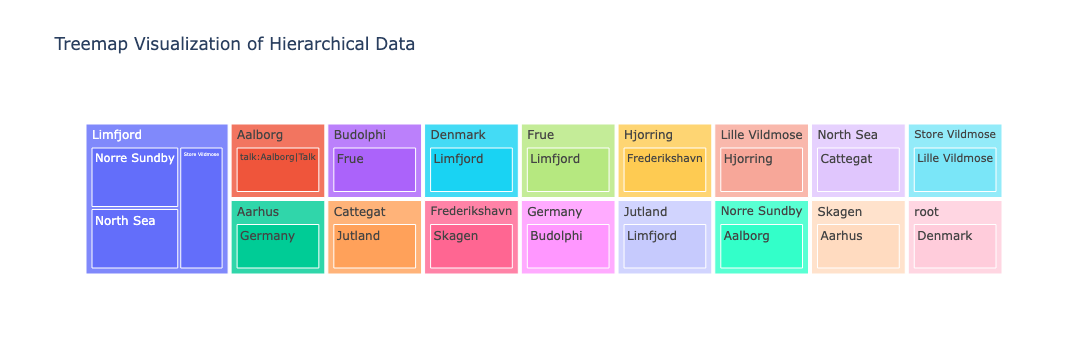

In [30]:
import plotly.express as px

# Flatten hierarchy for Treemap (for plotting)
def flatten_hierarchy_for_treemap(hierarchy, parent='root', parent_label='Root'):
    data = []
    
    def traverse(hierarchy, parent, parent_label):
        for child_label, child_subtree in hierarchy.items():
            data.append({'parent': parent, 'label': child_label})
            traverse(child_subtree, child_label, child_label)  # Recurse
    
    traverse(hierarchy, parent, parent_label)
    return data

# Flatten the hierarchy for Treemap
flattened_data = flatten_hierarchy_for_treemap(hierarchy_0)

# Create the Treemap
fig = px.treemap(
    flattened_data, 
    path=['parent', 'label'],  # Define hierarchical path
    title="Treemap Visualization of Hierarchical Data"
)

fig.show()


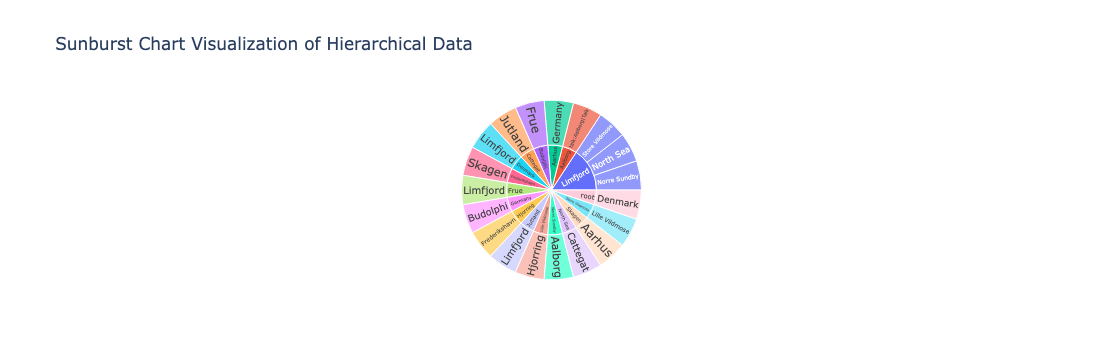

In [32]:
import plotly.express as px

# Create the Sunburst plot
fig = px.sunburst(
    flattened_data,
    path=['parent', 'label'],  # Define hierarchical path
    title="Sunburst Chart Visualization of Hierarchical Data"
)

# Show the plot
fig.show()


Super classes and subclasses are based on the relationship of the topic. The topic in this first example I am working with is "Municiple of Aalborg". So most of the markers collected are super classes to Aalborg, where "Aalborg talk" is a subclass, which inherits from the subject itself.

In [35]:
# meta needs only one parent which is the root
# all the children would be below "Aalborg" on the hierarchy

print(flattened_data)


[{'parent': 'root', 'label': 'Denmark'}, {'parent': 'Denmark', 'label': 'Limfjord'}, {'parent': 'Limfjord', 'label': 'North Sea'}, {'parent': 'North Sea', 'label': 'Cattegat'}, {'parent': 'Cattegat', 'label': 'Jutland'}, {'parent': 'Jutland', 'label': 'Limfjord'}, {'parent': 'Limfjord', 'label': 'Store Vildmose'}, {'parent': 'Store Vildmose', 'label': 'Lille Vildmose'}, {'parent': 'Lille Vildmose', 'label': 'Hjorring'}, {'parent': 'Hjorring', 'label': 'Frederikshavn'}, {'parent': 'Frederikshavn', 'label': 'Skagen'}, {'parent': 'Skagen', 'label': 'Aarhus'}, {'parent': 'Aarhus', 'label': 'Germany'}, {'parent': 'Germany', 'label': 'Budolphi'}, {'parent': 'Budolphi', 'label': 'Frue'}, {'parent': 'Frue', 'label': 'Limfjord'}, {'parent': 'Limfjord', 'label': 'Norre Sundby'}, {'parent': 'Norre Sundby', 'label': 'Aalborg'}, {'parent': 'Aalborg', 'label': 'talk:Aalborg|Talk'}]


In [37]:

lookup = {entry['label']: entry['parent'] for entry in flattened_data}

unique_parents = set(entry['parent'] for entry in flattened_data)

# Output the unique parents
print("Unique Parents:")
for parent in unique_parents:
    print(parent)

Unique Parents:
Cattegat
Lille Vildmose
Jutland
Germany
Aarhus
Store Vildmose
Limfjord
root
Frue
Denmark
Frederikshavn
Hjorring
Aalborg
Budolphi
North Sea
Norre Sundby
Skagen


In [39]:
print(lookup)

{'Denmark': 'root', 'Limfjord': 'Frue', 'North Sea': 'Limfjord', 'Cattegat': 'North Sea', 'Jutland': 'Cattegat', 'Store Vildmose': 'Limfjord', 'Lille Vildmose': 'Store Vildmose', 'Hjorring': 'Lille Vildmose', 'Frederikshavn': 'Hjorring', 'Skagen': 'Frederikshavn', 'Aarhus': 'Skagen', 'Germany': 'Aarhus', 'Budolphi': 'Germany', 'Frue': 'Budolphi', 'Norre Sundby': 'Limfjord', 'Aalborg': 'Norre Sundby', 'talk:Aalborg|Talk': 'Aalborg'}


In [41]:
parent_children = {}

# Iterate through the data to fill the parent-children relationships
for entry in flattened_data:
    parent = entry['parent']
    label = entry['label']
    
    if parent not in parent_children:
        parent_children[parent] = []
    
    parent_children[parent].append(label)

# Step 4: Print the parent-child relationships
for parent in unique_parents:
    print(f"Parent: {parent}")
    if parent in parent_children:
        print("Children: ", parent_children[parent])
    else:
        print("No children.")
    print()

Parent: Cattegat
Children:  ['Jutland']

Parent: Lille Vildmose
Children:  ['Hjorring']

Parent: Jutland
Children:  ['Limfjord']

Parent: Germany
Children:  ['Budolphi']

Parent: Aarhus
Children:  ['Germany']

Parent: Store Vildmose
Children:  ['Lille Vildmose']

Parent: Limfjord
Children:  ['North Sea', 'Store Vildmose', 'Norre Sundby']

Parent: root
Children:  ['Denmark']

Parent: Frue
Children:  ['Limfjord']

Parent: Denmark
Children:  ['Limfjord']

Parent: Frederikshavn
Children:  ['Skagen']

Parent: Hjorring
Children:  ['Frederikshavn']

Parent: Aalborg
Children:  ['talk:Aalborg|Talk']

Parent: Budolphi
Children:  ['Frue']

Parent: North Sea
Children:  ['Cattegat']

Parent: Norre Sundby
Children:  ['Aalborg']

Parent: Skagen
Children:  ['Aarhus']



This actually creates a node graph if you map it out, because the nodes have many parents. Understanding that helps us understand how to structure the data for ChromaDB embedding, to create ontology and semantics. This will be intense code work, but will give proper distribution and help explain relationships between data. Which is what I want to create and study in my Furby Project. 

In [44]:


display(unique_sha1_df)


title             timestamp             username  \
0   Aalborg Municipality  2002-02-04T03:55:24Z    Conversion script   
1   Aalborg Municipality  2002-02-25T15:43:11Z       imported>31.94   
2   Aalborg Municipality  2002-07-23T03:26:55Z        Magnus Manske   
3   Aalborg Municipality  2002-08-31T05:26:56Z          No username   
4   Aalborg Municipality  2002-09-09T01:24:37Z            The Epopt   
5   Aalborg Municipality  2001-06-26T22:58:46Z        KoyaanisQatsi   
6   Aalborg Municipality  2001-09-28T17:58:47Z      213.237.179.xxx   
7   Aalborg Municipality  2002-09-10T23:45:10Z       Christian List   
8   Aalborg Municipality  2002-10-16T16:12:13Z       Christian List   
9   Aalborg Municipality  2002-10-28T07:29:28Z              Olivier   
10  Aalborg Municipality  2002-11-10T09:21:05Z             Jeronimo   
11  Aalborg Municipality  2003-07-14T09:16:51Z  Torkil Bladt~enwiki   
12  Aalborg Municipality  2003-07-14T09:23:44Z  Torkil Bladt~enwiki   
13  Aalborg Municipality  2003-08-28T07:53:03Z         Wazow~enwiki   

                                              comment  \
0                                Automated conversion   
1                                                   *   
2                                              -/talk   
3                                           copy-edit   
4                                   removed self-link   
5   wikifying somewhat and removing 100-year-old f...   
6                                                   *   
7                                            Copyedit   
8                                                 da:   
9                                          No comment   
10                                               edit   
11  Minor corrections, Aalborg University, externa...   
12                                         No comment   
13                                                +pl   

                                                 text  \
0   '''Aalborg''' is a city and seaport of [[Denma...   
1   '''Aalborg''' is a city and seaport of [[Denma...   
2   '''Aalborg''' is a city and seaport of [[Denma...   
3   '''Aalborg''' is a city and seaport of [[Denma...   
4   '''Aalborg''' is a city and seaport of [[Denma...   
5   Aalborg, a city and seaport of [[Denmark]], th...   
6   '''Aalborg''' is a city and seaport of [[Denma...   
7   '''Aalborg''' is a city and seaport of [[Denma...   
8   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...   
9   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...   
10  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
11  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
12  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
13  [[da:Ålborg]][[pl:Aalborg]]\n'''Aalborg''' ([[...   

                               sha1  
0   tkvd4kutgn73kjac7zsi7fz06eri3c5  
1   56wfzuk883j23gvgs35e1v8zwpk1yco  
2   ahmh528xu6po727fb6y64j4nz1ge4dn  
3   75l5zymo21vc9krif06hvp5tttu1i1f  
4   f89w3kj8rfgxzx0xcjfsto0awpterfs  
5   0aan9isff7c08t160g7mb9qgaytpz0j  
6   syykxq03s0c98jmedhxatweo5vaj8os  
7   l042zychv4p7k25gh9gd41qw173xtjt  
8   ef9g3b9yuffr96x1m7ot2dyhqpzbp7k  
9   qzt7oze95h72es9qj2nfzrxqd5tvdgh  
10  2dufletsn1h6c2c2lt18yu3352kzyef  
11  b6v4z42mm5mkabm1bh71x51vidms1vd  
12  5qc3jntwk3ntxajzu0n1t5z2tzjoeqa  
13                          No sha1

In [46]:
print(text_df.iloc[13, 0])

[[da:Ålborg]][[pl:Aalborg]]
'''Aalborg''' ([[Danish language|Danish]]: ''Ålborg'', population 161,906 (2001)) is a city and seaport of [[Denmark]], the seat of a ([[Lutheran]]) [[bishop]], and chief town of the county of [[North Jutland]], on the south bank of the [[Limfjord]], which connects the [[North Sea]] and the [[Kattegat]]. Aalborg is the 4'th largest city in Denmark after [[Copenhagen]], [[Aarhus]] and [[Odense]]

===Surroundings===
The situation is typical of the north of Jutland.  To the west the Limfjord broadens into an irregular lake, with low, marshy shores and many islands.  Northwest is the [[Store Vildmose]], a swamp where the mir


In [48]:
print(text_df.iloc[12, 0])

[[da:Ålborg]]
'''Aalborg''' ([[Danish language|Danish]]: ''Ålborg'', population 161,906 (2001)) is a city and seaport of [[Denmark]], the seat of a ([[Lutheran]]) [[bishop]], and chief town of the county of [[North Jutland]], on the south bank of the [[Limfjord]], which connects the [[North Sea]] and the [[Kattegat]]. Aalborg is the 4'th largest city in Denmark after [[Copenhagen]], [[Aarhus]] and [[Odense]]

===Surroundings===
The situation is typical of the north of Jutland.  To the west the Limfjord broadens into an irregular lake, with low, marshy shores and many islands.  Northwest is the [[Store Vildmose]], a swamp where the mirage is seen in summer. Southeast lies the similar [[Lille Vildmose]].  Store Vildmose was drained and farmed in the beginning of the 20th century, and Lille Vildmose is now the largest moor in Denmark.

A railway connects Aalborg with [[Hjørring]], [[Frederikshavn]] and [[Skagen]] to the north, and with [[Aarhus]] and the lines from [[Germany]] to the sout

In [50]:
# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort DataFrame by timestamp in descending order
df = df.sort_values(by='timestamp', ascending=False)

# Get the most recent entry
most_recent_entry = df.iloc[0]

print("Most Recent Entry:")
print(most_recent_entry)

Most Recent Entry:
title                                     Aalborg Municipality
timestamp                            2003-08-28 07:53:03+00:00
username                                          Wazow~enwiki
comment                                                    +pl
text         [[da:Ålborg]][[pl:Aalborg]]\n'''Aalborg''' ([[...
sha1                                                   No sha1
Name: 13, dtype: object


<h2>Finding the best entry:</h2>
After looking at all the data in this wiki subject I need to find the best entry for decontruction to put in chromadb. Its important for me to learn and understand the data before I push forward and put it all into a database. Next steps are to do this to 400 xml subject files dynamically, with one python file. I printed off two text entries and noticed that some are more informative than others.

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
# going to try two of the dataframes, the one with unique sha1 numbers and the one with the entire dataframe

# Create a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(unique_sha1_df['text'])

# Sum TF-IDF scores for each document
unique_sha1_df['tfidf_score'] = tfidf_matrix.sum(axis=1).A1

# Find the text with the highest TF-IDF score
most_informative_tfidf = unique_sha1_df.sort_values(by='tfidf_score', ascending=False).iloc[0]

print("Most Informative Entry (TF-IDF):")
print(most_informative_tfidf)

Most Informative Entry (TF-IDF):
title                                       Aalborg Municipality
timestamp                                   2003-07-14T09:23:44Z
username                                     Torkil Bladt~enwiki
comment                                               No comment
text           [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...
sha1                             5qc3jntwk3ntxajzu0n1t5z2tzjoeqa
tfidf_score                                             7.712455
Name: 12, dtype: object


In [55]:
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Sum TF-IDF scores for each document
df['tfidf_score'] = tfidf_matrix.sum(axis=1).A1

# Find the text with the highest TF-IDF score
most_informative_tfidf = df.sort_values(by='tfidf_score', ascending=False).iloc[0]

print("Most Informative Entry (TF-IDF):")
print(most_informative_tfidf)

Most Informative Entry (TF-IDF):
title                                       Aalborg Municipality
timestamp                              2003-07-14 09:23:44+00:00
username                                     Torkil Bladt~enwiki
comment                                               No comment
text           [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...
sha1                             5qc3jntwk3ntxajzu0n1t5z2tzjoeqa
tfidf_score                                             7.712455
Name: 12, dtype: object


In [64]:
pip install sentence-transformers


Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install --upgrade transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install --upgrade tensorflow sentence-transformers transformers


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/73/5d/8bb8486058f6cda9903588f452c4774f3c3bbba6f840c582c5e92ac9ab95/sentence_transformers-3.4.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.3.1
    Uninstalling sentence-transformers-3.3.1:
      Successfully uninstalled sentence-transformers-3.3.1
Note: you may need to restart the kernel to use updated packages.


In [63]:
from sentence_transformers import SentenceTransformer, util
# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Compact and efficient model

# Encode the texts in the DataFrame
unique_sha1_df['embedding'] = unique_sha1_df['text'].apply(lambda x: model.encode(x, convert_to_tensor=True))

In [65]:
query = "Aalborg's historical significance and connection to Limfjord."
query_embedding = model.encode(query, convert_to_tensor=True)

In [67]:
unique_sha1_df['similarity'] = unique_sha1_df['embedding'].apply(lambda x: util.cos_sim(query_embedding, x).item())

# Sort DataFrame by similarity score
unique_sha1_df = unique_sha1_df.sort_values(by='similarity', ascending=False)

# Display the ranked texts
print(unique_sha1_df[['text', 'similarity']])

                                                 text  similarity
13  [[da:Ålborg]][[pl:Aalborg]]\n'''Aalborg''' ([[...    0.674356
6   '''Aalborg''' is a city and seaport of [[Denma...    0.661279
7   '''Aalborg''' is a city and seaport of [[Denma...    0.660020
11  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...    0.644452
12  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...    0.642973
8   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...    0.634024
9   [[da:Ålborg]]\n'''Aalborg''' is a city and sea...    0.632397
5   Aalborg, a city and seaport of [[Denmark]], th...    0.625623
10  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...    0.623138
0   '''Aalborg''' is a city and seaport of [[Denma...    0.622534
3   '''Aalborg''' is a city and seaport of [[Denma...    0.610831
4   '''Aalborg''' is a city and seaport of [[Denma...    0.610831
1   '''Aalborg''' is a city and seaport of [[Denma...    0.608234
2   '''Aalborg''' is a city and seaport of [[Denma...    0.608234


In [71]:
# Convert embeddings to NumPy arrays
unique_sha1_df['embedding'] = unique_sha1_df['embedding'].apply(lambda x: x.cpu().numpy() if hasattr(x, 'cpu') else x)

# Compute pairwise similarities between all texts
similarity_matrix = util.cos_sim(unique_sha1_df['embedding'].tolist(), unique_sha1_df['embedding'].tolist())
print(similarity_matrix)


tensor([[1.0000, 0.8613, 0.9117, 0.9515, 0.9656, 0.9275, 0.9264, 0.7862, 0.9233,
         0.8824, 0.8759, 0.8759, 0.8867, 0.8867],
        [0.8613, 1.0000, 0.9440, 0.8625, 0.8704, 0.9200, 0.8930, 0.8891, 0.8526,
         0.9775, 0.9684, 0.9684, 0.9723, 0.9723],
        [0.9117, 0.9440, 1.0000, 0.8926, 0.9034, 0.9726, 0.9600, 0.8550, 0.9230,
         0.9712, 0.9702, 0.9702, 0.9767, 0.9767],
        [0.9515, 0.8625, 0.8926, 1.0000, 0.9832, 0.9062, 0.9048, 0.8244, 0.9100,
         0.8759, 0.8692, 0.8692, 0.8773, 0.8773],
        [0.9656, 0.8704, 0.9034, 0.9832, 1.0000, 0.9246, 0.9225, 0.8153, 0.9268,
         0.8875, 0.8763, 0.8763, 0.8877, 0.8877],
        [0.9275, 0.9200, 0.9726, 0.9062, 0.9246, 1.0000, 0.9895, 0.8410, 0.9632,
         0.9477, 0.9426, 0.9426, 0.9576, 0.9576],
        [0.9264, 0.8930, 0.9600, 0.9048, 0.9225, 0.9895, 1.0000, 0.8204, 0.9764,
         0.9233, 0.9184, 0.9184, 0.9362, 0.9362],
        [0.7862, 0.8891, 0.8550, 0.8244, 0.8153, 0.8410, 0.8204, 1.0000, 0.7823,
  

/Users/jessicawoods/anaconda3/lib/python3.11/site-packages/sentence_transformers/util.py:44: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)



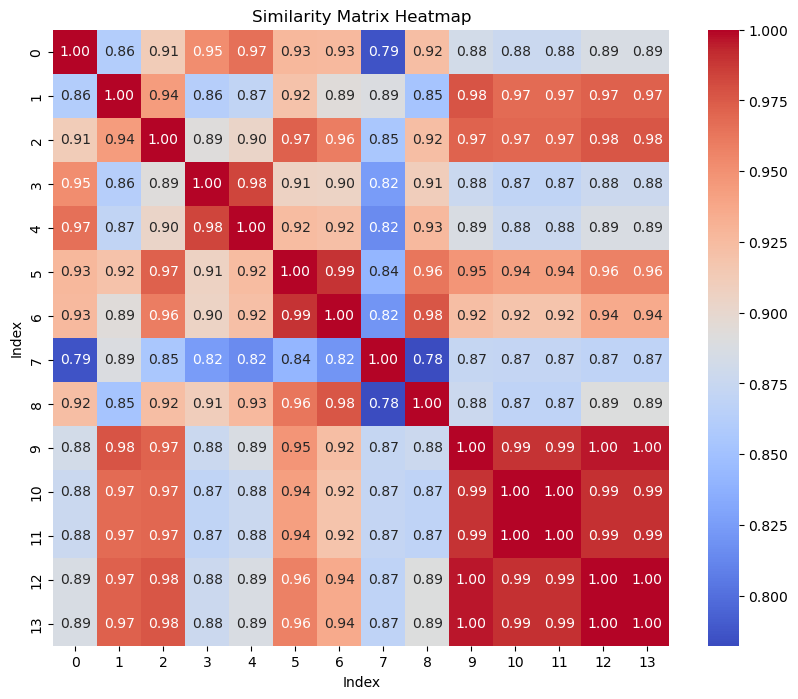

In [73]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the similarity matrix
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(similarity_matrix.numpy(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)

# Set labels and title
plt.title('Similarity Matrix Heatmap')
plt.xlabel('Index')
plt.ylabel('Index')

# Show the plot
plt.show()

<h2>Entry 12 text</h2>
Based on the TF-IDF score, it would be a reasonable choice to use Entry 12. It's probably the most valuable entry in terms of informativeness and specificity. The HeatMap created by tensors that are from the similarity matrix also points to Entry 12 as being more relavant as well. Using this one file and exploring, extracting, understanding the data structure, so it can be done dynamically with 400 other xml files simultaneously. Geo Data is so much more complicated than anything else, as far as using hierarchies because its not a straight node tree, its a node graph that uses many different parents and many children with different edge casings. 

In [76]:
# use a entry_12_df to represent all the fields needed to go in the chromadb. It will be saved back for another file 
# to process it directly into the chromadb. My Chromadb is on my Big spec tower. This process with the data can be done on 
# mac and saved back into a thumb drive to move it directly over to the bigger computer. This will be the last step needed to process this 
# file.
entry_12 = text_df.iloc[12, 0]
# Function to extract links
# Split the text into sections based on headings (e.g., ===Surroundings===)
sections = re.split(r'===+\s*(.*?)\s*===+', entry_12)

# Initialize the DataFrame with necessary columns
entry_12_df = pd.DataFrame(columns=['title', 'content', 'links', 'parent_nodes', 'child_nodes'])

# Extract links from the text
def extract_links(text):
    return re.findall(r'\[\[(.*?)\]\]', text)

# Build graph based on links
def build_graph_from_links(links):
    graph = {}
    for i in range(len(links)):
        current_link = links[i]
        if current_link not in graph:
            graph[current_link] = []
        if i + 1 < len(links):
            next_link = links[i + 1]
            if next_link not in graph[current_link]:
                graph[current_link].append(next_link)
    return graph

# Process the first entry ("Aalborg") separately
first_entry_links = extract_links(sections[0])  # Links found in the Aalborg entry
first_entry_graph = build_graph_from_links(first_entry_links)

# Add the first row with the title 'Aalborg', no parent-child nodes
first_row = {
    'title': 'Aalborg',  # Main entry title
    'content': sections[0],  # Content about Aalborg itself
    'links': first_entry_links,
    'parent_nodes': ['Aalborg'],  # Only "Aalborg" as the parent
    'child_nodes': first_entry_links,  # Links in Aalborg as child nodes
}

# Initialize DataFrame with the first row
entry_12_df = pd.concat([entry_12_df, pd.DataFrame([first_row])], ignore_index=True)

# Process subsequent sections: Surroundings, Industry, Architecture
for i in range(1, len(sections), 2):
    title = sections[i].strip()  # Section title (e.g., Surrounded, Industry, Architecture)
    content = sections[i + 1].strip()  # Section content
    links = extract_links(content)  # Extract links from the content
    section_graph = build_graph_from_links(links)  # Build graph for this section

    # The parent nodes are always ['Aalborg'] for these sections
    parent_nodes = ['Aalborg'] + first_entry_links  # Always include Aalborg and the links in the first section


    # Create the section title (e.g., Aalborg_Surroundings, Aalborg_Industry)
    section_title = f'Aalborg_{title.strip()}'

    # Create the row for this section
    
    section_row = {
        'title': section_title,  # Title in the form "Aalborg | <Section>"
        'content': content,
        'links': links,
        'parent_nodes': parent_nodes,  # Always ["Aalborg"] and links from the first entry
        'child_nodes': links, # are the links in the new content
    }

    # Add the section row to the DataFrame
    entry_12_df = pd.concat([entry_12_df, pd.DataFrame([section_row])], ignore_index=True)

# Display the updated DataFrame
display(entry_12_df)

title                                            content  \
0               Aalborg  [[da:Ålborg]]\n'''Aalborg''' ([[Danish languag...   
1  Aalborg_Surroundings  The situation is typical of the north of Jutla...   
2      Aalborg_Industry  Aalborg is a growing industrial and commercial...   
3  Aalborg_Architecture  An old castle and some picturesque houses of t...   

                                               links  \
0  [da:Ålborg, Danish language|Danish, Denmark, L...   
1  [Store Vildmose, Lille Vildmose, Hjørring, Fre...   
2                               [Aalborg University]   
3  [17th century, Budolphi, 18th century, Vor Fru...   

                                        parent_nodes  \
0                                          [Aalborg]   
1  [Aalborg, da:Ålborg, Danish language|Danish, D...   
2  [Aalborg, da:Ålborg, Danish language|Danish, D...   
3  [Aalborg, da:Ålborg, Danish language|Danish, D...   

                                         child_nodes  
0  [da:Ålborg, Danish language|Danish, Denmark, L...  
1  [Store Vildmose, Lille Vildmose, Hjørring, Fre...  
2                               [Aalborg University]  
3  [17th century, Budolphi, 18th century, Vor Fru...

In [78]:
import re

def clean_text(text):
    """
    Clean the provided text by removing unnecessary formatting and improving readability.
    Args:
    - text (str): The raw text to be cleaned.
    
    Returns:
    - str: The cleaned text.
    """
  # Step 1: Remove language prefixes (e.g., 'da:', 'en:', etc.)
    text = re.sub(r'^[a-z]+:', '', text)

    # Step 2: Remove all wiki links, including those with nested or complex formats
    while re.search(r'\[\[.*?\]\]', text):  # Keep checking for wiki links
        # Handle links like [[A|B]] and [[A]]
        text = re.sub(r'\[\[([^\|]+)\|[^\]]+\]\]', r'\1', text)  # Remove '[[A|B]]' -> 'A'
        text = re.sub(r'\[\[([^\]]+)\]\]', r'\1', text)  # Remove '[[A]]' -> 'A'

    # Step 3: Remove trailing closing brackets (in case there's any leftover after removing wiki links)
    text = re.sub(r'\]\]$', '', text)  # Remove any trailing ']]'
    text = re.sub(r'^\[\[', '', text)  # Remove any leading '[['

    # Step 4: Remove all content inside parentheses (e.g., "(2001)")
    text = re.sub(r'\(.*?\)', '', text)

    # Step 5: Remove stray parentheses, quotes, and other unwanted symbols
    text = re.sub(r"[()''']", '', text)  # Removes all parentheses, single quotes, and double single quotes

    # Step 6: Normalize all whitespace to a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Step 7: Remove leading or trailing punctuation like commas, periods, etc.
    text = re.sub(r'^[^\w\s]+', '', text)  # Remove leading punctuation (e.g., ',')
    text = re.sub(r'[^\w\s]+$', '', text)  # Remove trailing punctuation

    
    return text



# Apply cleaning function twice to the same entry
for i in range(len(entry_12_df)):
    # First pass
    entry_12_df.at[i, 'cleaned_text'] = clean_text(entry_12_df.at[i, 'content'])
   


# Display the cleaned text


display(entry_12_df.at[0, 'cleaned_text'])


'da:Ålborg]] Aalborg is a city and seaport of [[Denmark, the seat of a bishop, and chief town of the county of North Jutland, on the south bank of the Limfjord, which connects the North Sea and the Kattegat. Aalborg is the 4th largest city in Denmark after Copenhagen, Aarhus and Odense'

In [128]:
# for some reason this one particular entry wanted to be special

text = entry_12_df.at[0, 'cleaned_text']

# Step 1: Remove the first part 'da:Ålborg]]'
text = text.replace('da:Ålborg]]', '')

# Step 2: Remove wiki-style links like '[[Denmark' and ']]'
text = text.replace('[[Denmark', 'Denmark')  # Removes '[[Denmark' and keeps 'Denmark'
text = text.replace(']]', '')  # Removes any ']]' that may remain from wiki-style links

# Step 3: If there are other wiki-style links like '[[Kattegat]]', remove those
text = text.replace('[[Kattegat', 'Kattegat')  # Removes '[[Kattegat' and keeps 'Kattegat'

# Step 4: Clean up any remaining trailing ']]' (if any)
text = text.replace(']]', '')
entry_12_df.at[0, 'cleaned_text'] = text
# Final cleaned text
print(entry_12_df.at[0, 'cleaned_text'])

 Aalborg is a city and seaport of Denmark, the seat of a bishop, and chief town of the county of North Jutland, on the south bank of the Limfjord, which connects the North Sea and the Kattegat. Aalborg is the 4th largest city in Denmark after Copenhagen, Aarhus and Odense


In [91]:
pip install spacy pandas networkx matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [172]:
import re
import pandas as pd

#have to define the three relationships between these links to ensure I have the parent nodes and child nodes done correctly
# Comparison, Geography, Functional
#I am going to break it down into sentences and then build it up from there- wiki is gramatically challenged with run on sentences OMG-
restructure = entry_12_df[['cleaned_text', 'links', 'title']].copy()



# so this df will hold the breakdown of the data into further fragments to define relationships properly
sentence_restructure_df = pd.DataFrame(columns=['timestamp','meta_namespace','semantic_tags', 'meta_topic', 'title', 'content','links','original_fragment','sentence_restructured', 'relationship'])
# first split at ':'
def first_split(df, content, links, title, meta_namespace):
    fragments = content.split(',')
    print(fragments)
    for fragment in fragments:
       new_row = pd.DataFrame({'original_fragment': [fragment], 'content': [content], 'links' : [links], 'title': [title], 'meta_namespace':[meta_namespace]})
        
        # Concatenate the new row with the existing DataFrame
       df = pd.concat([df, new_row], ignore_index=True)
    return df
    
def split_period(df):
    # Create an empty list to store new rows
    new_rows = []
    
    for index, row in df.iterrows():
        fragment = row['original_fragment']
        content = df.at[index, 'content']
        links = df.at[index, 'links']
        title = df.at[index, 'title']
        meta = df.at[index, 'meta_namespace']
        # If the fragment does not start with 'and', split by 'and'
        parts = fragment.split('.')
        for part in parts:
            part = part.strip()  # Strip any leading/trailing whitespace
            if part:  # Avoid adding empty fragments
                new_rows.append({'original_fragment': [part], 'content': [content], 'links': [links], 'title': [title], 'meta_namespace':[meta]})
                print(f"Prepared new row: {part}")
        df = df.drop(index)
        
    if new_rows:
        df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
    return df
   
        
#restructure the sentence fragments  
def restructure_fragment(df):
    # Create an empty list to store new rows
    new_rows = []
   
    for index, row in df.iterrows():
        fragment = row['original_fragment']
        # If the fragment does not start with 'and', split by 'and'
        content = df.at[index, 'content']
        title = df.at[index, 'title']
        meta = df.at[index, 'meta_namespace']
        # Check if fragment is a list and convert it to a string
        links = df.at[index, 'links']
        if isinstance(fragment, list):
            fragment = ' '.join(fragment)
        
        # Ensure fragment is a string before using re.split()
        if isinstance(fragment, str):
            # Split by 'and' and avoid splitting when 'and' is part of a word
            parts = re.split(r'\band\b', fragment)
        
        
            for part in parts:
                part = part.strip()  # Strip any leading/trailing whitespace
                if part:  # Avoid adding empty fragments
                    new_rows.append({'original_fragment': part, 'content': [content], 'links': [links], 'title':[title], 'meta_namespace': [meta]})
                    print(f"Prepared new row: {part}")
        df = df.drop(index)
            
        
    # Append all the new rows at once to avoid multiple concatenations
    if new_rows:
        df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
        
    df = split_period(df)
    return df
    
# test the first split
for index, row in restructure.iterrows():
    sentence_restructure_df = first_split(sentence_restructure_df, restructure.at[index, 'cleaned_text'], restructure.at[index, 'links'], restructure.at[index, 'title'], 'Geographical Entities' )
    sentence_restructure_df = restructure_fragment(sentence_restructure_df)


#test restructure
display(sentence_restructure_df)



[' Aalborg is a city and seaport of Denmark', ' the seat of a bishop', ' and chief town of the county of North Jutland', ' on the south bank of the Limfjord', ' which connects the North Sea and the Kattegat. Aalborg is the 4th largest city in Denmark after Copenhagen', ' Aarhus and Odense']
Prepared new row: Aalborg is a city
Prepared new row: seaport of Denmark
Prepared new row: the seat of a bishop
Prepared new row: chief town of the county of North Jutland
Prepared new row: on the south bank of the Limfjord
Prepared new row: which connects the North Sea
Prepared new row: the Kattegat. Aalborg is the 4th largest city in Denmark after Copenhagen
Prepared new row: Aarhus
Prepared new row: Odense
Prepared new row: Aalborg is a city
Prepared new row: seaport of Denmark
Prepared new row: the seat of a bishop
Prepared new row: chief town of the county of North Jutland
Prepared new row: on the south bank of the Limfjord
Prepared new row: which connects the North Sea
Prepared new row: the Ka

timestamp                           meta_namespace semantic_tags  \
0        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
1        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
2        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
3        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
4        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
5        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
6        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
7        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
8        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
9        NaN  [[[[[[[['Geographical Entities']]]]]]]]           NaN   
10       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
11       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
12       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
13       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
14       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
15       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
16       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
17       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
18       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
19       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
20       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
21       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
22       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
23       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
24       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
25       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
26       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
27       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
28       NaN      [[[[[['Geographical Entities']]]]]]           NaN   
29       NaN          [[[['Geographical Entities']]]]           NaN   
30       NaN          [[[['Geographical Entities']]]]           NaN   
31       NaN          [[[['Geographical Entities']]]]           NaN   
32       NaN          [[[['Geographical Entities']]]]           NaN   
33       NaN          [[[['Geographical Entities']]]]           NaN   
34       NaN                [[Geographical Entities]]           NaN   
35       NaN                [[Geographical Entities]]           NaN   
36       NaN                [[Geographical Entities]]           NaN   
37       NaN                [[Geographical Entities]]           NaN   
38       NaN                [[Geographical Entities]]           NaN   
39       NaN                [[Geographical Entities]]           NaN   
40       NaN                [[Geographical Entities]]           NaN   
41       NaN                [[Geographical Entities]]           NaN   
42       NaN                [[Geographical Entities]]           NaN   
43       NaN                [[Geographical Entities]]           NaN   
44       NaN                [[Geographical Entities]]           NaN   
45       NaN                [[Geographical Entities]]           NaN   
46       NaN                [[Geographical Entities]]           NaN   
47       NaN                [[Geographical Entities]]           NaN   
48       NaN                [[Geographical Entities]]           NaN   
49       NaN                [[Geographical Entities]]           NaN   
50       NaN                [[Geographical Entities]]           NaN   
51       NaN                [[Geographical Entities]]           NaN   
52       NaN                [[Geographical Entities]]           NaN   
53       NaN                [[Geographical Entities]]           NaN   

   meta_topic                               title  \
0         NaN           [[[[[[[['Aalborg']]]

In [174]:

sentence_restructure_df = sentence_restructure_df.drop([49, 50, 51, 52, 53])
# clean off brackets
sentence_restructure_df['original_fragment'] = sentence_restructure_df['original_fragment'].apply(lambda x: str(x).strip('[]').replace('[', '').replace(']', ''))
sentence_restructure_df['content'] = sentence_restructure_df['content'].apply(lambda x: str(x).strip('[]').replace('[', '').replace(']', ''))
sentence_restructure_df['title'] = sentence_restructure_df['title'].apply(lambda x: str(x).strip('[]').replace('[', '').replace(']', ''))
sentence_restructure_df['meta_namespace'] = sentence_restructure_df['meta_namespace'].apply(lambda x: str(x).strip('[]').replace('[', '').replace(']', ''))

pd.set_option('display.max_colwidth', None)
display(sentence_restructure_df['original_fragment'])

0                                                                                  'Aalborg is a city'
1                                                                                 'seaport of Denmark'
2                                                                               'the seat of a bishop'
3                                                          'chief town of the county of North Jutland'
4                                                                  'on the south bank of the Limfjord'
5                                                                       'which connects the North Sea'
6                                                                                       'the Kattegat'
7                                        'Aalborg is the 4th largest city in Denmark after Copenhagen'
8                                                                                             'Aarhus'
9                                                                        

In [176]:
sentence_restructure_df['links'] = sentence_restructure_df['links'].apply(lambda x: str(x).strip('[]').replace('[', '').replace(']', ''))
semantic_tags = ["Aalborg Municipality", "City", "Administrative Division", "Political Entity", "Region"]
meta_topic = ["Municipalities in Denmark", "Geographical Locations", "Cities in North Jutland"]
time_stamp = df.at[12, 'timestamp']
sentence_restructure_df['semantic_tags'] = [semantic_tags] * len(sentence_restructure_df)
sentence_restructure_df['timestamp'] = [time_stamp] * len(sentence_restructure_df)
sentence_restructure_df['meta_topic'] = [meta_topic] * len(sentence_restructure_df)
sentence_restructure_df['semantic_tags'] = sentence_restructure_df['semantic_tags'].apply(lambda x: str(x).strip('[]').replace('[', '').replace(']', ''))
sentence_restructure_df['meta_topic'] = sentence_restructure_df['meta_topic'].apply(lambda x: str(x).strip('[]').replace('[', '').replace(']', ''))

display(sentence_restructure_df)

timestamp           meta_namespace  \
0  2003-07-14 09:23:44+00:00  'Geographical Entities'   
1  2003-07-14 09:23:44+00:00  'Geographical Entities'   
2  2003-07-14 09:23:44+00:00  'Geographical Entities'   
3  2003-07-14 09:23:44+00:00  'Geographical Entities'   
4  2003-07-14 09:23:44+00:00  'Geographical Entities'   
5  2003-07-14 09:23:44+00:00  'Geographical Entities'   
6  2003-07-14 09:23:44+00:00  'Geographical Entities'   
7  2003-07-14 09:23:44+00:00  'Geographical Entities'   
8  2003-07-14 09:23:44+00:00  'Geographical Entities'   
9  2003-07-14 09:23:44+00:00  'Geographical Entities'   
10 2003-07-14 09:23:44+00:00  'Geographical Entities'   
11 2003-07-14 09:23:44+00:00  'Geographical Entities'   
12 2003-07-14 09:23:44+00:00  'Geographical Entities'   
13 2003-07-14 09:23:44+00:00  'Geographical Entities'   
14 2003-07-14 09:23:44+00:00  'Geographical Entities'   
15 2003-07-14 09:23:44+00:00  'Geographical Entities'   
16 2003-07-14 09:23:44+00:00  'Geographical Entities'   
17 2003-07-14 09:23:44+00:00  'Geographical Entities'   
18 2003-07-14 09:23:44+00:00  'Geographical Entities'   
19 2003-07-14 09:23:44+00:00  'Geographical Entities'   
20 2003-07-14 09:23:44+00:00  'Geographical Entities'   
21 2003-07-14 09:23:44+00:00  'Geographical Entities'   
22 2003-07-14 09:23:44+00:00  'Geographical Entities'   
23 2003-07-14 09:23:44+00:00  'Geographical Entities'   
24 2003-07-14 09:23:44+00:00  'Geographical Entities'   
25 2003-07-14 09:23:44+00:00  'Geographical Entities'   
26 2003-07-14 09:23:44+00:00  'Geographical Entities'   
27 2003-07-14 09:23:44+00:00  'Geographical Entities'   
28 2003-07-14 09:23:44+00:00  'Geographical Entities'   
29 2003-07-14 09:23:44+00:00  'Geographical Entities'   
30 2003-07-14 09:23:44+00:00  'Geographical Entities'   
31 2003-07-14 09:23:44+00:00  'Geographical Entities'   
32 2003-07-14 09:23:44+00:00  'Geographical Entities'   
33 2003-07-14 09:23:44+00:00  'Geographical Entities'   
34 2003-07-14 09:23:44+00:00  'Geographical Entities'   
35 2003-07-14 09:23:44+00:00  'Geographical Entities'   
36 2003-07-14 09:23:44+00:00  'Geographical Entities'   
37 2003-07-14 09:23:44+00:00  'Geographical Entities'   
38 2003-07-14 09:23:44+00:00  'Geographical Entities'   
39 2003-07-14 09:23:44+00:00  'Geographical Entities'   
40 2003-07-14 09:23:44+00:00  'Geographical Entities'   
41 2003-07-14 09:23:44+00:00  'Geographical Entities'   
42 2003-07-14 09:23:44+00:00  'Geographical Entities'   
43 2003-07-14 09:23:44+00:00  'Geographical Entities'   
44 2003-07-14 09:23:44+00:00  'Geographical Entities'   
45 2003-07-14 09:23:44+00:00  'Geographical Entities'   
46 2003-07-14 09:23:44+00:00  'Geographical Entities'   
47 2003-07-14 09:23:44+00:00  'Geographical Entities'   
48 2003-07-14 09:23:44+00:00  'Geographical Entities'   

                                                                              semantic_tags  \
0   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
1   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
2   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
3   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
4   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
5   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
6   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
7   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
8   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
9   'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
10  'Aalborg Municipality', 'City', 'Administrative Division', 'Political Entity', 'Region'   
11  'Aalborg Municipality', 

<h2>Data is cleaned, Saving Data to XML for further Processing</h2>

In [179]:
# had AI issues...and this far down in the data...its best to save the df to a xml to finalize and process with AI
# in another notebook- essentially the chromadb entire entry is done other than the parent, child, and node graph. 
sentence_restructure_df.to_xml("/Volumes/NO NAME/xml_chunks/Aalborg_Cleaned_Data.xml", root_name="root", row_name="row")
